In [1]:
# Dependencies and Setup
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Uber Data Config

In [2]:
# Files to Load

uber_data_paths = [
    "Data/uber_data_aprsep_2014.csv",
    "Data/uber_data_janjune_2015.csv"
]

uber_ride_data_paths = [
    "Data/rides_per_day_aprsep_2014.csv",
    "Data/rides_per_day_janjune_2015.csv"
]

uber_summary_data_paths = [
    "Data/uber_summary_aprsep_2014.csv",
    "Data/uber_summary_janjune_2015.csv",
]


#### Uber Data with Times

In [3]:
# Initialize an empty list to store uber_ride_data
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_data = pd.concat(data_frames, ignore_index=True)
print("Uber Data:")
uber_data.head()



Uber Data:


,Base,Date,Time
0,B02512,2014-04-01,0:11:00
1,B02512,2014-04-01,0:17:00
2,B02512,2014-04-01,0:21:00
3,B02512,2014-04-01,0:28:00
4,B02512,2014-04-01,0:33:00


#### WIth Bases Listed

In [4]:
# Initialize an empty list to store uber_ride_data
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_ride_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_ride_data_wb = pd.concat(data_frames, ignore_index=True)
uber_ride_data_wb.head()

,Base,Date,Number of trips
0,B02512,2014-04-30,2107
1,B02512,2014-04-04,1768
2,B02512,2014-09-05,1752
3,B02512,2014-05-16,1686
4,B02512,2014-07-15,1618


#### Without Bases Listed

In [5]:
uber_ride_data_c = uber_ride_data_wb.copy()

# Remove the "Base" column
uber_ride_data_c = uber_ride_data_c.drop(columns=['Base'])

# Convert the "Date" column to datetime if it's not already
uber_ride_data_c['Date'] = pd.to_datetime(uber_ride_data_c['Date'])

# Group by "Date" and calculate the total number of trips for each unique date
uber_ride_data = uber_ride_data_c.groupby('Date')['Number of trips'].sum().reset_index()
uber_ride_data.head()

,Date,Number of trips
0,2014-04-01,14376
1,2014-04-02,17230
2,2014-04-03,20482
3,2014-04-04,26353
4,2014-04-05,19273


In [6]:
# Extract 'Number of trips' data
data = uber_ride_data['Number of trips'].values

# Perform the Shapiro-Wilk test
stat, p = shapiro(data)

# Interpretation
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Data does not look Gaussian (reject H0)


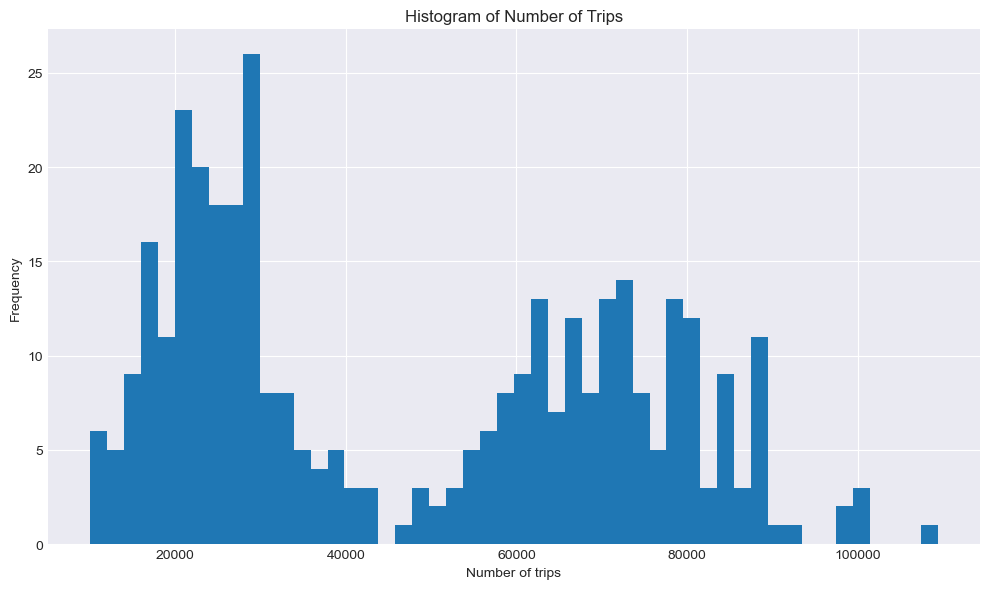

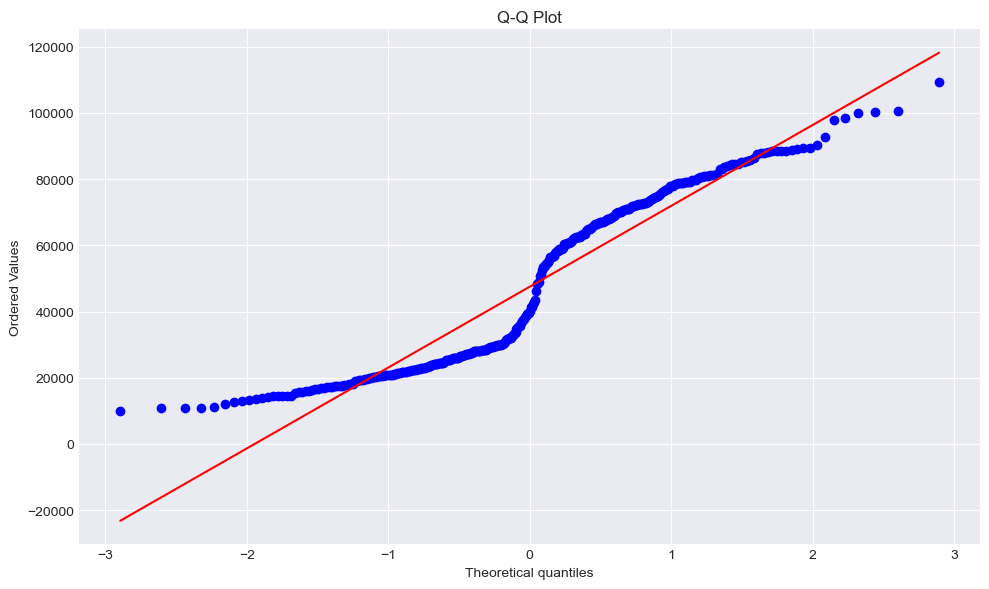

In [7]:
# Set a default style
plt.style.use('seaborn-darkgrid')

# Histogram
plt.figure(figsize=(10,6))
plt.hist(uber_ride_data['Number of trips'], bins=50)
plt.title('Histogram of Number of Trips')
plt.xlabel('Number of trips')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("histogram_of_number_of_trips.svg", format='svg', dpi=300)
plt.show()
plt.close()

# Q-Q Plot
plt.figure(figsize=(10,6))
stats.probplot(uber_ride_data['Number of trips'], plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()
plt.savefig("qq_plot.svg", format='svg', dpi=300)
plt.show()
plt.close()

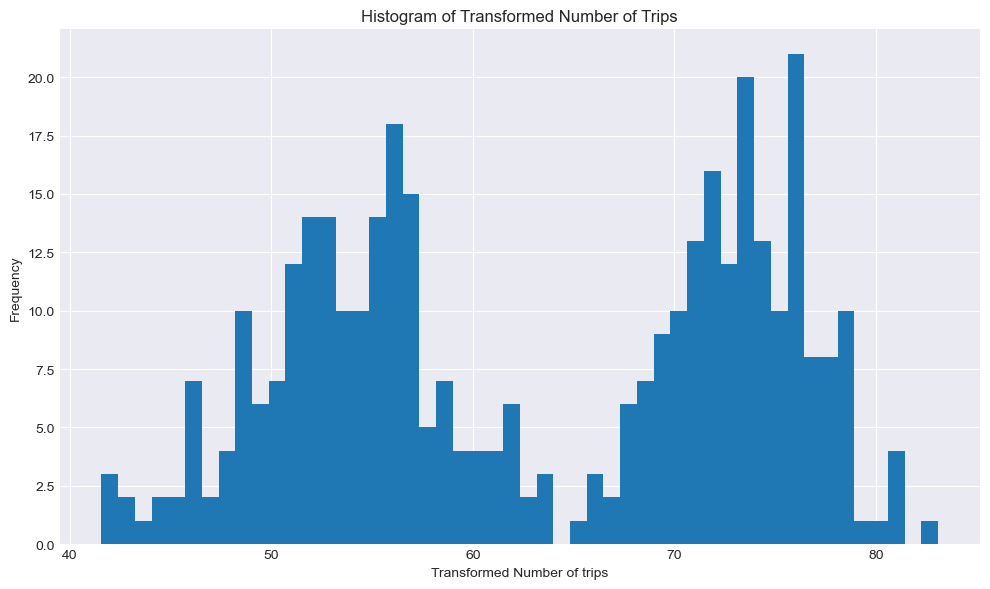

In [8]:
# Box-Cox Transformed Histogram
transformed_data, lambda_value = stats.boxcox(uber_ride_data['Number of trips'])
plt.figure(figsize=(10,6))
plt.hist(transformed_data, bins=50)
plt.title('Histogram of Transformed Number of Trips')
plt.xlabel('Transformed Number of trips')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("histogram_of_transformed_number_of_trips.svg", format='svg', dpi=300)
plt.show()
plt.close()


#### Uber Summary Data

In [9]:
# Initialize an empty list to store DataFrames
data_frames = []

# Read each CSV file and append its DataFrame to the list
for file_path in uber_summary_data_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all DataFrames in the list into one DataFrame
uber_summary_data = pd.concat(data_frames)

uber_summary_data = uber_summary_data.reset_index(drop=True)

uber_summary_data = uber_summary_data.drop([10, 11, 12])

print("Uber Summary Data:")
uber_summary_data

Uber Summary Data:


,Base,Total Trips,Maximum Trips,Minimum Trips,Start Date,End Date,Total Days,Average Trips/Day,Most Active Day,Least Active Day
0,B02512,200353,2107,391,2014-04-01,2014-09-30,183,1094.825137,2014-04-30,2014-07-05
1,B02598,1379578,13383,3509,2014-04-01,2014-09-30,183,7538.677596,2014-04-30,2014-07-05
2,B02617,1417983,16037,1934,2014-04-01,2014-09-30,183,7748.540984,2014-09-05,2014-04-20
3,B02682,1198901,13151,2867,2014-04-01,2014-09-30,183,6551.371585,2014-04-30,2014-07-05
4,B02764,254931,9229,114,2014-04-01,2014-09-30,183,1393.065574,2014-09-27,2014-07-05
5,B02617,248444,2500,377,2015-01-01,2015-06-30,181,1372.618785,2015-02-13,2015-04-05
6,B02598,1441905,12559,2860,2015-01-01,2015-06-30,181,7966.325967,2015-02-13,2015-01-27
7,B02682,1943107,17088,4322,2015-01-01,2015-06-30,181,10735.397790,2015-02-14,2015-01-27
8,B02764,3057302,37329,4454,2015-01-01,2015-06-30,181,16891.171271,2015-06-27,2015-01-27
9,B02512,5013875,46134,12271,2015-01-01,2015-06-30,181,27700.966851,2015-02-14,2015-01-27


# Weather Integration

In [10]:
weather_path = "Data/weather_data_2014-2015.csv"
weather_daily_path = "Data/weather_daily_summary_2014-2015.csv"

#### Weather Data with Daytimes

In [11]:
# Read each CSV file and append its DataFrame to the list
weather_data = pd.read_csv(weather_path)
weather_data.head()

,Date,time_HMS,temp,feels_like,temp_min,temp_max,humidity,wind_speed,Cloudiness,weather_description
0,2014-01-01,0:00:00,32.23,20.43,30.16,32.43,48,19.55,0,sky is clear
1,2014-01-01,1:00:00,30.78,18.18,30.15,31.26,50,23.00,0,sky is clear
2,2014-01-01,2:00:00,30.27,18.57,28.36,30.94,48,17.27,0,sky is clear
3,2014-01-01,3:00:00,28.78,16.18,26.56,29.95,46,20.69,0,sky is clear
4,2014-01-01,4:00:00,27.64,15.04,26.24,28.94,44,19.55,0,sky is clear


#### Weather Data by Days

In [12]:
weather_daily = pd.read_csv(weather_daily_path)
weather_daily.head()

,Date,Mean_Temp,Mean_Feels_Like,Min_Temp,Max_Temp,Mean_Humidity,Mean_Wind_Speed,Mean_Cloudiness,Weather_Description
0,2014-01-01,28.941667,19.074167,22.96,34.95,48.958333,12.807917,13.125000,sky is clear
1,2014-01-02,29.206538,18.154615,22.96,34.14,71.576923,16.800000,93.846154,overcast clouds
2,2014-01-03,16.499286,3.899286,10.04,26.55,75.642857,20.561786,75.714286,snow
3,2014-01-04,15.930417,5.985417,6.76,28.11,50.083333,8.940000,3.125000,sky is clear
4,2014-01-05,30.174138,22.742759,18.95,37.11,76.068966,8.063793,59.310345,sky is clear


# Weather and Ride Data

In [27]:
# Create an empty DataFrame to store the merged data
ride_weather_data = pd.DataFrame()

uber_ride_data['Date'] = pd.to_datetime(uber_ride_data['Date'])
weather_daily['Date'] = pd.to_datetime(weather_daily['Date'])


# Iterate through unique dates in uber_ride_data
for date in uber_ride_data['Date'].unique():
    datetime_value = pd.Timestamp(date)
    date_part = datetime_value.strftime('%Y-%m-%d')
    
    # Filter rows with the current date in uber_ride_data
    uber_rows = uber_ride_data[uber_ride_data['Date'] == date_part]
    
    # Filter rows with the current date in weather_daily
    weather_rows = weather_daily[weather_daily['Date'] == date_part]
    
    # Create a new DataFrame with the merged data
    merged_rows = pd.merge(uber_rows, weather_rows, on='Date')
    
    # Append the merged data to the overall merged_data DataFrame
    ride_weather_data = pd.concat([ride_weather_data, merged_rows], ignore_index=True)

#Saves ride_weather_data to a .csv
ride_weather_data.to_csv('ride_weather_data.csv', index=False)

ride_weather_data

,Date,Number of trips,Mean_Temp,Mean_Feels_Like,Min_Temp,Max_Temp,Mean_Humidity,Mean_Wind_Speed,Mean_Cloudiness,Weather_Description
0,2014-04-01,14376,46.994583,41.735417,35.94,61.03,47.708333,10.919167,0.833333,sky is clear
1,2014-04-02,17230,46.833333,43.668333,39.99,53.94,66.458333,6.657917,28.958333,sky is clear
2,2014-04-03,20482,52.919167,50.192083,42.01,67.35,50.791667,6.417083,0.000000,sky is clear
3,2014-04-04,26353,44.803077,38.980385,39.99,55.74,72.807692,11.565000,92.307692,light rain
4,2014-04-05,19273,45.201429,39.788929,39.00,55.36,71.392857,16.367857,77.321429,mist
...,...,...,...,...,...,...,...,...,...,...
359,2015-06-26,86287,73.835833,73.507083,68.99,80.49,55.083333,8.668750,62.500000,broken clouds
360,2015-06-27,109381,68.684400,68.369600,60.51,76.01,66.280000,9.359600,69.600000,overcast clouds
361,2015-06-28,80811,66.128611,66.526111,59.43,75.40,86.861111,15.771111,99.305556,mist
362,2015-06-29,66346,70.360417,69.815000,62.55,77.47,57.833333,11.585833,58.958333,overcast clouds


# Visualization

#### Temp vs. Number of Trips

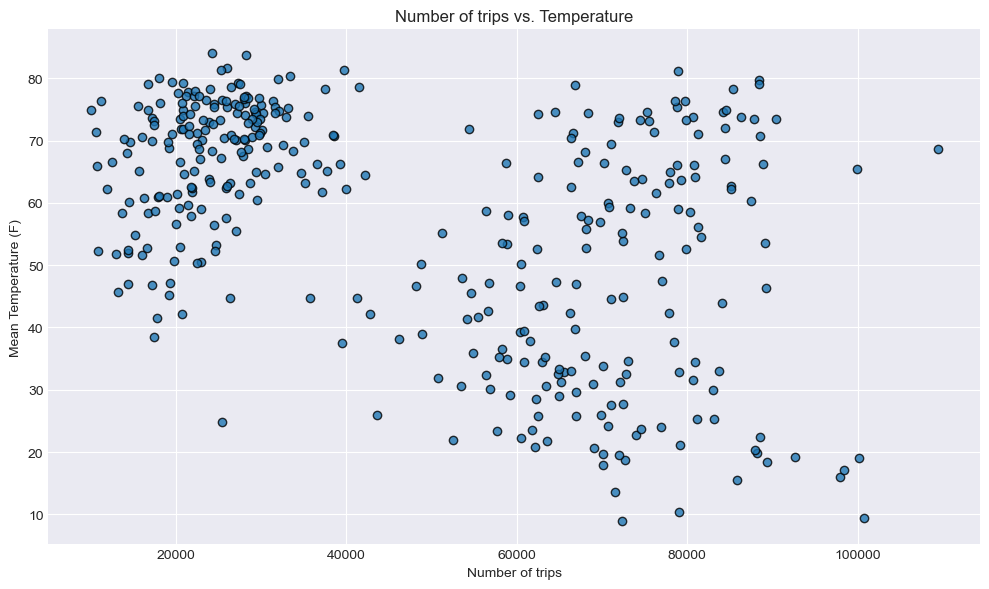

In [14]:
# Temp vs. Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Temp"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Temperature")
plt.xlabel("Number of trips")
plt.ylabel("Mean Temperature (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_temperature.svg", format='svg', dpi=300)
plt.show()
plt.close()

#### Humidity Vs. Number of Trips

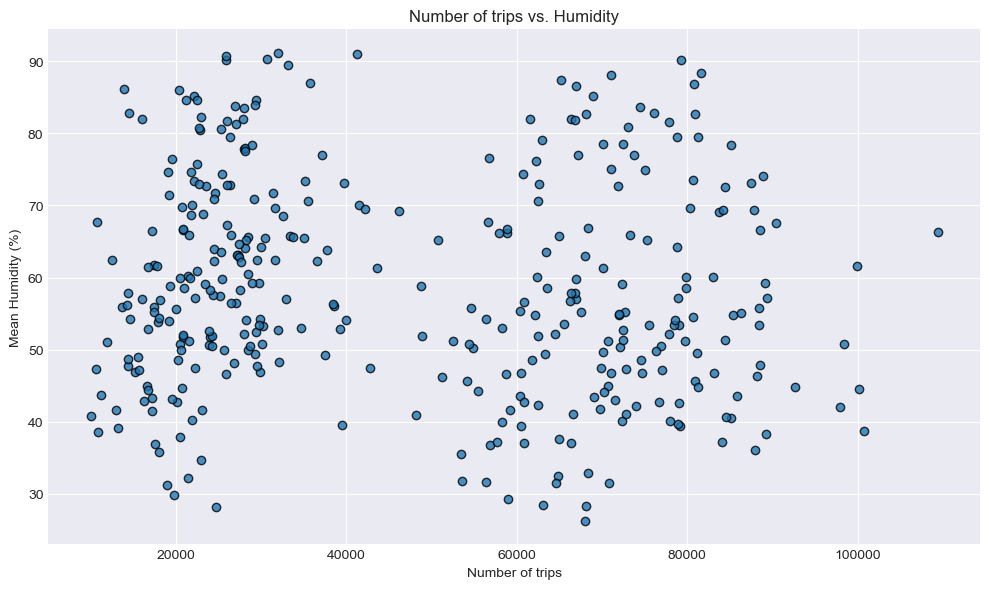

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Humidity"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Humidity")
plt.xlabel("Number of trips")
plt.ylabel("Mean Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_humidity.svg", format='svg', dpi=300)
plt.show()
plt.close()


#### Max Temp Vs. Number of Trips

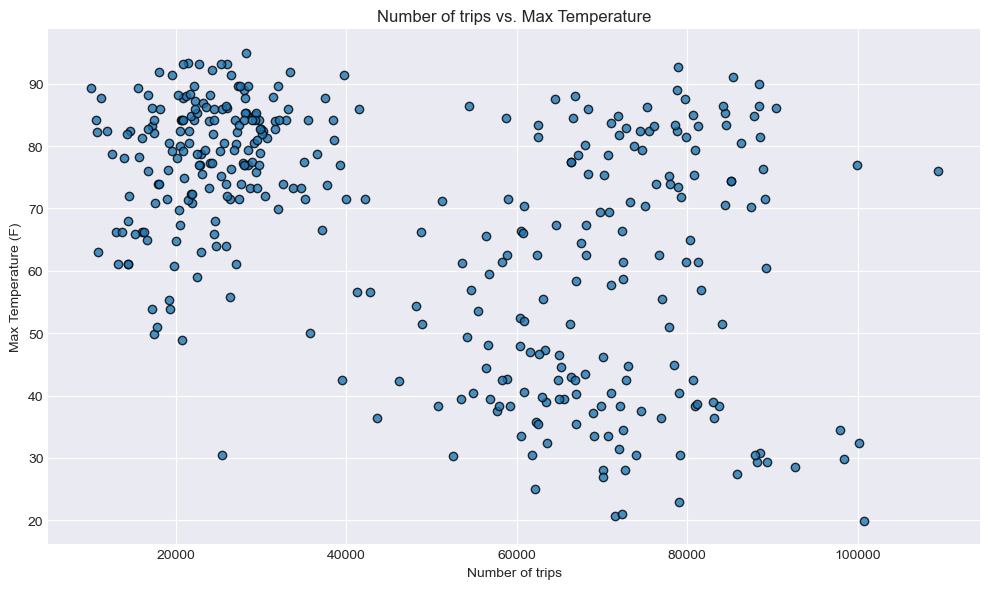

In [16]:
# Max Temp vs. Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Max_Temp"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Max Temperature")
plt.xlabel("Number of trips")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_max_temperature.svg", format='svg', dpi=300)
plt.show()
plt.close()

#### Min Temp Vs. Number of Trips

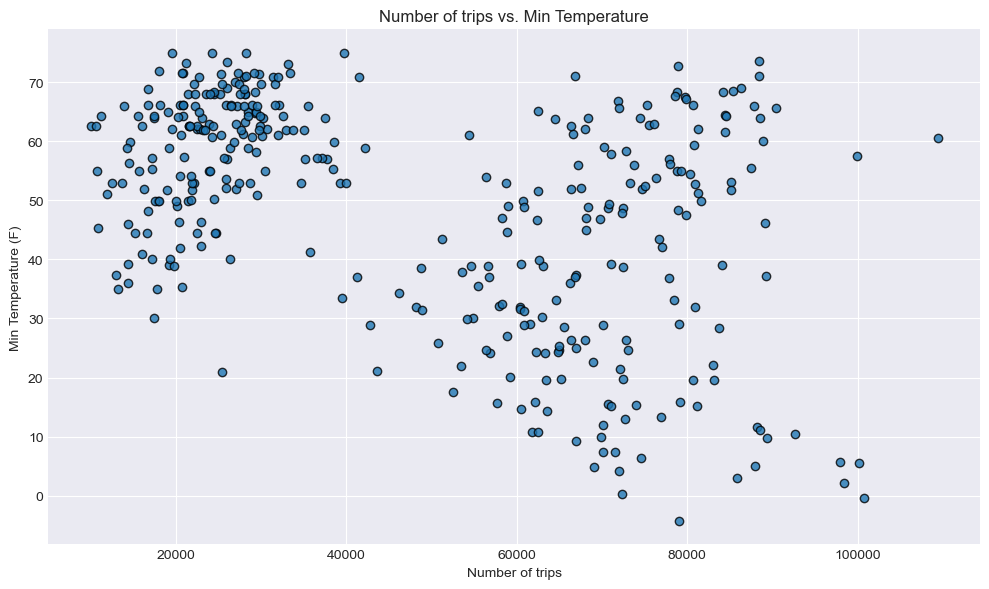

In [17]:
# Min Temp vs. Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Min_Temp"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Min Temperature")
plt.xlabel("Number of trips")
plt.ylabel("Min Temperature (F)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_min_temperature.svg", format='svg', dpi=300)
plt.show()
plt.close()

#### Cloudiness Vs. Number of Trips

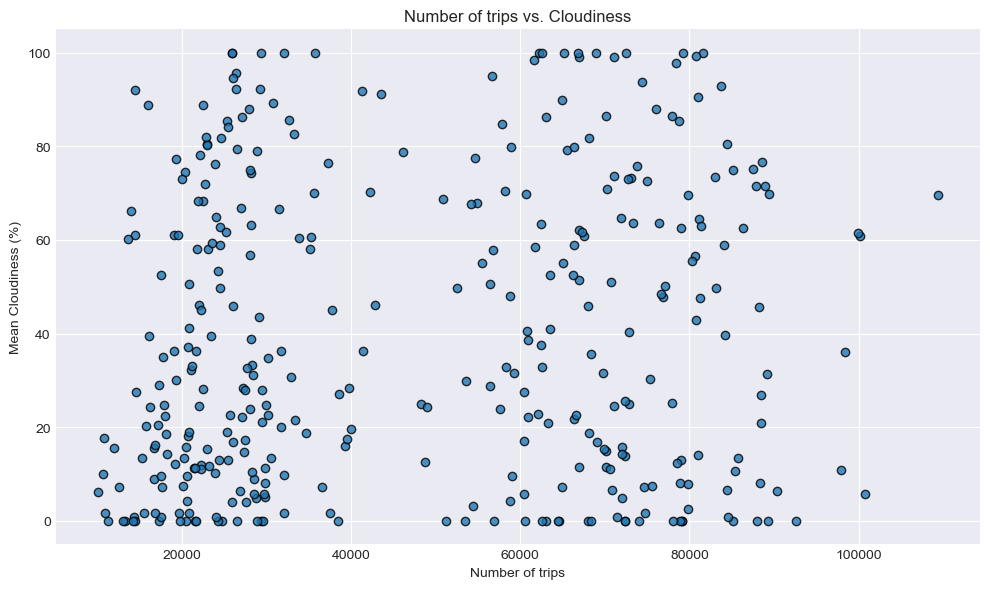

In [18]:
# Cloudiness vs. Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Cloudiness"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Cloudiness")
plt.xlabel("Number of trips")
plt.ylabel("Mean Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_cloudiness.svg", format='svg', dpi=300)
plt.show()
plt.close()

#### Wind Speed Vs. Number of Trips

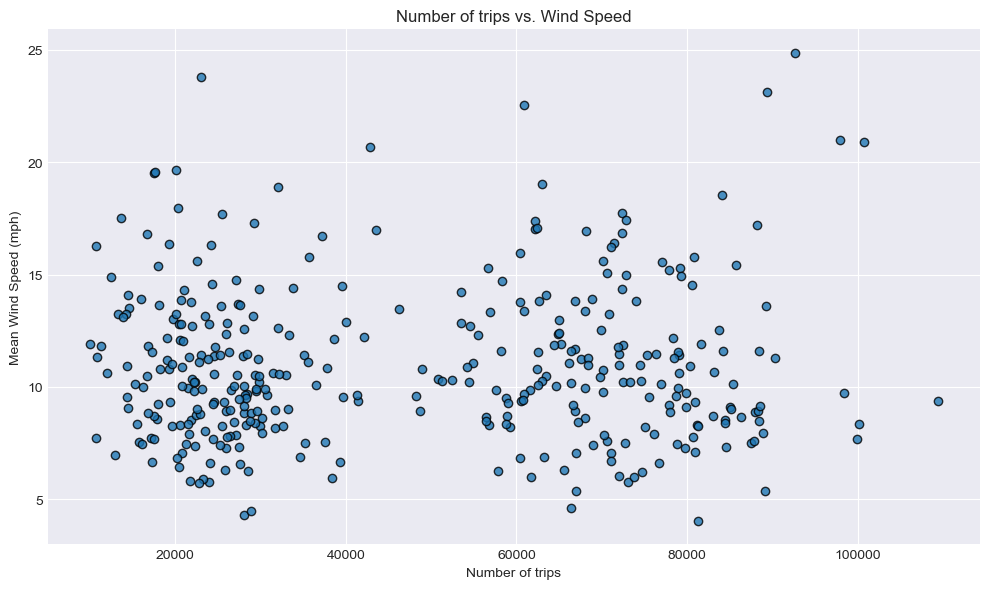

In [19]:
# Wind Speed vs. Number of Trips
plt.figure(figsize=(10,6))
plt.scatter(ride_weather_data["Number of trips"], ride_weather_data["Mean_Wind_Speed"], marker="o", edgecolors="black", alpha=0.8)
plt.title("Number of trips vs. Wind Speed")
plt.xlabel("Number of trips")
plt.ylabel("Mean Wind Speed (mph)")
plt.grid(True)
plt.tight_layout()
plt.savefig("number_of_trips_vs_wind_speed.svg", format='svg', dpi=300)
plt.show()
plt.close()

# Statistics 

In [20]:
# Calculate the correlations
correlations = {
    "Mean Humidity": ride_weather_data["Number of trips"].corr(ride_weather_data["Mean_Humidity"]),
    "Max Temperature": ride_weather_data["Number of trips"].corr(ride_weather_data["Max_Temp"]),
    "Min Temperature": ride_weather_data["Number of trips"].corr(ride_weather_data["Min_Temp"]),
    "Mean Cloudiness": ride_weather_data["Number of trips"].corr(ride_weather_data["Mean_Cloudiness"]),
    "Mean Wind Speed": ride_weather_data["Number of trips"].corr(ride_weather_data["Mean_Wind_Speed"]),
    "Mean Temperature": ride_weather_data["Number of trips"].corr(ride_weather_data["Mean_Temp"])
}

# Convert the correlations to percentages and display them
print("Correlations (as percentages) between Number of Trips and Weather Metrics:\n")
for metric, corr in correlations.items():
    print(f"{metric}: {corr*100:.2f}%")


Correlations (as percentages) between Number of Trips and Weather Metrics:

Mean Humidity: -9.47%
Max Temperature: -45.28%
Min Temperature: -44.91%
Mean Cloudiness: 12.59%
Mean Wind Speed: 3.87%
Mean Temperature: -46.11%


# Weather and Ride Data  (w/Bases)

In [21]:
# Create an empty DataFrame to store the merged data
ride_weather_data_wb = pd.DataFrame()

uber_ride_data_wb['Date'] = pd.to_datetime(uber_ride_data_wb['Date'])
weather_daily['Date'] = pd.to_datetime(weather_daily['Date'])

# Iterate through unique dates in uber_ride_data_wb
for date in uber_ride_data_wb['Date'].unique():
    date_part = str(date)[:10]  # Convert to string and extract the date part
    
    # Filter rows with the current date in uber_ride_data_wb
    uber_rows = uber_ride_data_wb[uber_ride_data_wb['Date'] == date]
    
    # Filter rows with the current date in weather_daily
    weather_rows = weather_daily[weather_daily['Date'] == date_part]
    
    # Create a new DataFrame with the merged data
    merged_rows = pd.merge(uber_rows, weather_rows, on='Date')
    
    # Append the merged data to the overall ride_weather_data_wb DataFrame
    ride_weather_data_wb = pd.concat([ride_weather_data_wb, merged_rows], ignore_index=True)


In [22]:
# List of weather metrics to compare with Number of Trips
weather_metrics = ["Mean_Temp", "Mean_Humidity", "Max_Temp", "Min_Temp", "Mean_Cloudiness", "Mean_Wind_Speed"]

for metric in weather_metrics:
    # Generate scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(ride_weather_data["Number of trips"], ride_weather_data[metric], marker="o", edgecolors="black", alpha=0.8)
    plt.title(f"Number of trips vs. {metric.replace('_', ' ')}")
    plt.xlabel("Number of trips")
    plt.ylabel(metric.replace('_', ' '))
    plt.grid(True)
    
    # Save the plot as an SVG file
    plt.savefig(f"{metric}_vs_trips.svg", format="svg")
    plt.close()  # Close the current figure


In [24]:
# Extract relevant columns from the ride_weather_data
relevant_columns = ['Number of trips', 'Mean_Temp', 'Mean_Feels_Like', 'Min_Temp', 'Max_Temp', 'Mean_Humidity', 'Mean_Wind_Speed', 'Mean_Cloudiness']
filtered_data = ride_weather_data[relevant_columns]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                 Number of trips  Mean_Temp  Mean_Feels_Like  Min_Temp  \
Number of trips         1.000000  -0.461103        -0.458705 -0.449106   
Mean_Temp              -0.461103   1.000000         0.998680  0.988130   
Mean_Feels_Like        -0.458705   0.998680         1.000000  0.987322   
Min_Temp               -0.449106   0.988130         0.987322  1.000000   
Max_Temp               -0.452817   0.985281         0.984688  0.959686   
Mean_Humidity          -0.094713   0.228472         0.251975  0.287115   
Mean_Wind_Speed         0.038734  -0.296081        -0.316176 -0.264198   
Mean_Cloudiness         0.125949  -0.128539        -0.107847 -0.044912   

                 Max_Temp  Mean_Humidity  Mean_Wind_Speed  Mean_Cloudiness  
Number of trips -0.452817      -0.094713         0.038734         0.125949  
Mean_Temp        0.985281       0.228472        -0.296081        -0.128539  
Mean_Feels_Like  0.984688       0.251975        -0.316176        -0.107847  
Min_Temp         0.959686

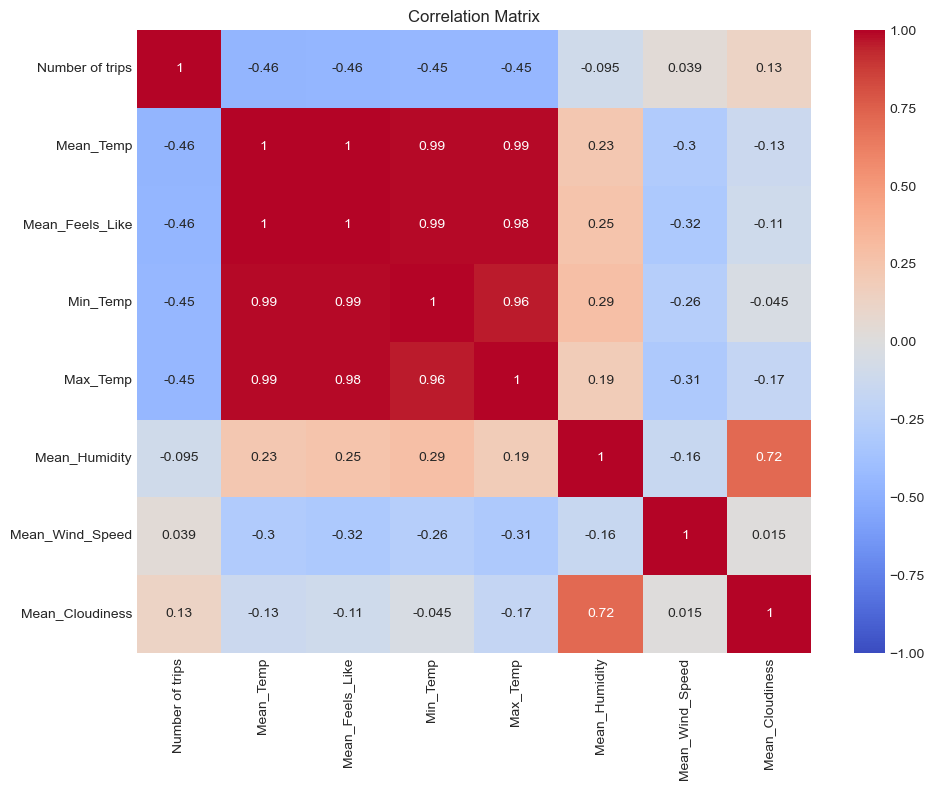

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("Correlation_Matrix.svg", format='svg', dpi=300)
plt.show()
plt.close()
plt.show()
